# Potresi

V tej projektni nalogi sem zbrala podatke o potresih z magnitudo 4+ v obdobju od 7. 1. 2013 do 1. 11. 2016. Zanje si bomo poskušali pogledati kateri je bil najmočnejši in če obstaja kakšna povezava med globino in magnitudo. Mogoče naletimo še na kakšno presenečenje, ki ga trenutno ne pričakujemo ter ga bomo kasneje pogledali.

## Uvod

Najprej naložimo paket, ki nam bo pomagal, ter omejimo razpredelnice na 20 vrstic. Spodaj že vidimo našo glavno tabelo, katera nam bo pomagala vsaj podati občutek kaj gledamo in s čim se bomo ukvarjali.

In [15]:
#naložimo paket pandas
import pandas as pd
potres=pd.read_csv('potresi.csv', index_col='id')
potresi=pd.read_csv('potresi.csv')
#omejitev razpredelnice (20 vrstic)
pd.options.display.max_rows=20
#za grafe moramo uporabiti še
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
potres

,leto,mesec,dan,ura,drzava,sirina,dolzina,globina,magnituda
id,,,,,,,,,
541962,2016,11,1,07:56:39,CENTRAL ITALY,43.00,13.16,10,4.9
541688,2016,10,31,16:02:43,OWEN FRACTURE ZONE REGION,20.85,61.73,10,5.5
541642,2016,10,31,13:44:00,CENTRAL IRAN,30.76,56.53,2,4.4
541620,2016,10,31,11:59:49,ROMANIA,45.87,26.78,90,4.0
541564,2016,10,31,09:38:13,BOSNIA AND HERZEGOVINA,43.26,17.88,8,4.2
541498,2016,10,31,07:05:45,CENTRAL ITALY,42.83,13.17,20,4.2
541428,2016,10,31,03:27:40,CENTRAL ITALY,42.77,13.09,11,4.3
541212,2016,10,30,18:21:09,CENTRAL ITALY,42.79,13.15,10,4.2
541060,2016,10,30,13:34:54,CENTRAL ITALY,42.80,13.17,9,4.6


## Najmočnejši potresi

Potresi neprestano nastajajo, ampak v povprečju na leto pa je veliko manj tistih , ki imajo magnitudo višjo od 6.  Takih naj bi bilo na leto nekje med 100 in 200. Zato si lahko ogledamo koliko sem zajela takih, ki so višji ali enaki 6.

In [16]:
#vrne tabelo s potresi, ki imajo magnitudo višjo ali enako od 6
#zaradi lažje preglednosti lahko razvrstimo padajoče po magnitudi in naraščajoče po letu
potresi[potresi.magnituda>=6].sort_values(['magnituda','leto'], ascending=[False, True])

,id,leto,mesec,dan,ura,drzava,sirina,dolzina,globina,magnituda
2867,312831,2013,4,16,10:44:20,IRAN-PAKISTAN BORDER REGION,28.14,62.08,87,7.8
1959,379935,2014,5,24,09:25:02,AEGEAN SEA,40.29,25.40,27,6.9
607,470390,2015,11,17,07:10:08,GREECE,38.76,20.45,10,6.5
21,540796,2016,10,30,06:40:18,CENTRAL ITALY,42.84,13.11,10,6.5
2433,338758,2013,10,12,13:11:54,"CRETE, GREECE",35.56,23.31,47,6.4
2934,311828,2013,4,9,11:52:50,SOUTHERN IRAN,28.48,51.58,10,6.3
481,484213,2016,1,25,04:22:02,STRAIT OF GIBRALTAR,35.70,3.71,10,6.3
2673,321766,2013,6,15,16:10:59,"CRETE, GREECE",34.23,25.00,10,6.2
2784,316362,2013,5,11,02:08:14,SOUTHERN IRAN,26.79,57.85,30,6.2
1768,395244,2014,8,18,02:32:05,IRAN-IRAQ BORDER REGION,32.58,47.62,10,6.2


Potres z najvišjo magnitudo, (kar je bilo vzetih podatkov) je potres 2867, ki je na območju meje med Iranom in Pakistanom. Rezutat ne preseneča prav veliko, saj tam se stikajo tri tektonske plošče (Afriška, Indijske in Arabska). In zaradi premikov se ustvarijo močni potresi, saj pride do trkov plošč.
Natančneje si oglejmo kdaj, s kakšno magnitudo in na kakšni globini se je zgodil ta potres.

In [5]:
potres.iloc[2867]

id                                312831
leto                                2013
mesec                                  4
dan                                   16
ura                             10:44:20
drzava       IRAN-PAKISTAN BORDER REGION
sirina                             28.14
dolzina                            62.08
globina                               87
magnituda                            7.8
Name: 2867, dtype: object

Poglejmo si sedaj koliko potresov je bilo katero leto. Naj povdarim, da pri letu 2013 manjka prvi teden v letu in v letu 2016 manjkata zadnje dva meseca. Tako da bolj očitne podatke bomo dobili za leto 2014 in 2015.

leto
2013     827
2014    1094
2015     667
2016     521
Name: drzava, dtype: int64

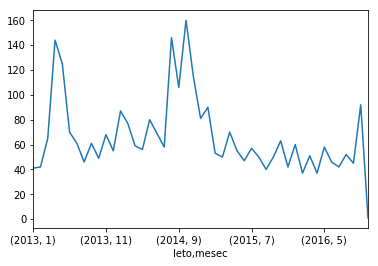

In [24]:
#združi vse potrese, ki so bili istega leta
potres_leto=potres.groupby('leto')
#vrne tabelo s preštetimi lastnostmi na leto (število potresov v enem letu)
stevilo=potres_leto.count()
#graf potresov na leto
letoINmesec=potres.groupby(('leto','mesec')).count()
letoINmesec['drzava'].plot(kind='line')
#posebni stolpec za drzavo
stevilo['drzava']

Po razpredelnici vidimo, da je bilo največ potresov leta 2014, na grafu pa lahko odčitamo podobno opazko. Mogoče bi bilo zanimivo še pogledati povprečje vseh teh magnitud, saj mogoče je bilo več potresov in so bili šibkejši.

In [19]:
#vrne povprečno magnitudo na leto
potres_leto['magnituda'].mean()

leto
2013    4.412213
2014    4.448355
2015    4.394603
2016    4.412860
Name: magnituda, dtype: float64

Leto 2014 je bilo očitno kar burno leto potresov, saj smo opazili, da so bili takrat v povprečju najmočnejši in naj se spomnimo, da med njimi ni tistega, ki je bil najmočnejši z magnitudo 7.8 na meji med Iranom in Pakistanom. Torej lahko sklepamo, da so bili tistega leta kar močni.
Poglejmo si potrese leta 2014 z magnitudo 6+.

In [21]:
#vrne tabelo s potresi, ki so se zgodili 2014
tabela2014=potres[potres.leto==2014]
#vrne tabelo s potresi, ki imajo magnitudo višjo ali enako od 6 v letu 2014
vecje6=tabela2014[tabela2014.magnituda>=6]
#magnitude razporejene od najmanjše do največje
urejeno2014=vecje6.sort_values('magnituda')
urejeno2014

,leto,mesec,dan,ura,drzava,sirina,dolzina,globina,magnituda
id,,,,,,,,,
391719,2014,7,19,14:14:02,OWEN FRACTURE ZONE REGION,11.61,57.78,10,6.0
357329,2014,2,3,03:08:45,GREECE,38.26,20.32,2,6.0
355461,2014,1,26,13:55:43,GREECE,38.19,20.41,18,6.1
395244,2014,8,18,02:32:05,IRAN-IRAQ BORDER REGION,32.58,47.62,10,6.2
379935,2014,5,24,09:25:02,AEGEAN SEA,40.29,25.40,27,6.9


Zanimivo, za podatke smo dobili Grčijo, Egejsko morje in del v Indijskem oceanu, kateri poteka med Arabsko, Afriško in Indijsko ploščo. Vse te tri omenjene plošče se premikajo proti Evrazijski plošči (in obratno). Grčija in Egejsko morje, pa sta seveda ravno blizu meje med Evrazijski ploščo in Afriško. Torej iz tega lahko sklepamo, da se je leta 2014 res nekaj dogajalo okoli teh štirih plošč.

## Država z največ potresi

In [25]:
#združi vse potrese, ki so se zgodili v isti državi
potres_drzava=potres.groupby('drzava')
#vrne tabelo s preštetimi lastnostmi (število potresov v drzavi)
steviloD=potres_drzava.count()
#posebni stolpec za drzavo, urejeno padajoče, prvih 20
steviloD['leto'].sort_values(ascending=False)[:20]

drzava
SOUTHERN IRAN                 404
ICELAND                       282
GREECE                        228
CRETE, GREECE                 185
IRAN-IRAQ BORDER REGION       127
WESTERN TURKEY                 99
NORTHERN ALGERIA               66
CENTRAL ITALY                  64
SOUTHERN GREECE                60
EASTERN TURKEY                 59
WESTERN IRAN                   58
STRAIT OF GIBRALTAR            57
ROMANIA                        56
AEGEAN SEA                     52
CENTRAL TURKEY                 49
OWEN FRACTURE ZONE REGION      49
CENTRAL IRAN                   48
GULF OF ADEN                   45
DODECANESE ISLANDS, GREECE     41
NORTHERN IRAN                  38
Name: leto, dtype: int64

Opazimo, da smo naleteli na problem, ker so zajeti podatki obravnavani bolj na posameznih področjih, kot državah. Zato moramo najti funkcijo, ki bi naredila čim boljši približek tega v kateri državi se je potres zares zgodil.
Zakaj čim boljši približek - ker kot smo že videli zgoraj imamo problem, ker ogromno potresov nastane ravno na meji tektonskih plošč, na meji med eno in drugo državo, ...

In [38]:
def najdi_drzavo(drz):
    dodatki={'NORTH':6, 'NORTHEAST':10, 'NORTHWEST':10, 'NORTHERN':9, 
            'SOUTH':6, 'SOUTHEAST':10, 'SOUTHWEST':10, 'SOUTHERN':9, 
            'EAST':5, 'EASTERN':8, 'WEST':5, 'WESTERN':8,
            'THE':4, 'OF':3, 'NEAR':5, 'OFF':4, 'OFFSHORE':9, 'COAST':6,
            'RISE':-5, 'RIDGE':-6, 'REGION':-7, 'BORDER':-7, 'PENINSULA':-10,
            'CENTRAL':8}
    kratice={'REG.':'REGION', 'CALIF.':'CALIFORNIA', 'FYROM':'FYR OF MACEDONIA',
             'CAUCASUS REGION':'RUSSIA', 'N.Z.':'NEW ZEALAND', 'IS.':'ISLAND'}
    #radi bi odstranili vse smeri neba, dodatke, kratice, ... in presledek
    if ' ' in drz:
        naZacetku=drz[:drz.index(' ')]
        naKoncu=drz[-(drz[::-1].index(' ')):]
    elif drz in kratice:
        return kratice[drz]
    else:
        return drz
    if len(naZacetku)==1:
        novo=drz[2:]
    elif naZacetku in dodatki:
        novo=drz[dodatki[naZacetku]:]
        return najdi_drzavo(novo)
    elif naKoncu in dodatki:
        novo=drz[:dodatki[naKoncu]]
        return najdi_drzavo(novo)
    else:
        return drz

Poskusimo narediti novo tabelo, kjer bodo države bolj "prečiščene"

In [44]:
potres['NOVAdrz']=potres['drzava'].map(najdi_drzavo)
potres

,leto,mesec,dan,ura,drzava,sirina,dolzina,globina,magnituda,NOVAdrz
id,,,,,,,,,,
541962,2016,11,1,07:56:39,CENTRAL ITALY,43.00,13.16,10,4.9,ITALY
541688,2016,10,31,16:02:43,OWEN FRACTURE ZONE REGION,20.85,61.73,10,5.5,OWEN FRACTURE ZONE
541642,2016,10,31,13:44:00,CENTRAL IRAN,30.76,56.53,2,4.4,IRAN
541620,2016,10,31,11:59:49,ROMANIA,45.87,26.78,90,4.0,ROMANIA
541564,2016,10,31,09:38:13,BOSNIA AND HERZEGOVINA,43.26,17.88,8,4.2,BOSNIA AND HERZEGOVINA
541498,2016,10,31,07:05:45,CENTRAL ITALY,42.83,13.17,20,4.2,ITALY
541428,2016,10,31,03:27:40,CENTRAL ITALY,42.77,13.09,11,4.3,ITALY
541212,2016,10,30,18:21:09,CENTRAL ITALY,42.79,13.15,10,4.2,ITALY
541060,2016,10,30,13:34:54,CENTRAL ITALY,42.80,13.17,9,4.6,ITALY


Super, z novo funkcijo smo očstili kar nekaj podatkov in na srečo nismo izgubili niti ene vrstice. Torej dela.
Preverimo sedaj še enkrat, katera država je bila deležna največje število potresov.

In [45]:
#združi vse potrese, ki so se zgodili v isti državi
potres_NOVAdrz=potres.groupby('NOVAdrz')
#vrne tabelo s preštetimi lastnostmi (število potresov v drzavi)
steviloD=potres_NOVAdrz.count()
#posebni stolpec za drzavo, urejeno padajoče, prvih 20
steviloD['leto'].sort_values(ascending=False)[:20]

NOVAdrz
IRAN                          579
ICELAND                       316
GREECE                        288
TURKEY                        226
CRETE, GREECE                 185
IRAN-IRAQ                     127
ITALY                         102
ALGERIA                        67
MEDITERRANEAN SEA              60
STRAIT OF GIBRALTAR            57
ROMANIA                        56
AEGEAN SEA                     52
OWEN FRACTURE ZONE             49
GULF OF ADEN                   45
DODECANESE ISLANDS, GREECE     41
JAN MAYEN ISLAND               35
CYPRUS                         34
NORTHEASTERN IRAN              31
MID-ATLANTIC                   30
CANARY ISLANDS, SPAIN          30
Name: leto, dtype: int64

Vidimo, da imamo še vedno probleme z otoki pri posameznih državam, ampak naj bodo otoki ločeno napisani.
V Iranu je bilo največ potresov. Sedaj si lahko ogledamo še s kakšno povprečno magnitudo se je zgodil potres v posamezni držvi.

In [49]:
#združi vse potrese, ki so bili v isti državi
potres_NOVAdrz=potres.groupby('NOVAdrz')
#vrne povprečno magnitudo na drzavo
potres_NOVAdrz['magnituda'].mean().sort_values(ascending=False)[:20]

NOVAdrz
TYRRHENIAN SEA                 5.800000
CARLSBERG                      4.850000
IRAN-PAKISTAN                  4.788235
OWEN FRACTURE ZONE             4.771429
PAKISTAN                       4.750000
AZORES ISLANDS                 4.730769
REYKJANES                      4.700000
GULF OF ADEN                   4.684444
MID-ATLANTIC                   4.680000
STRAIT OF HORMUZ               4.666667
UKRAINE                        4.666667
EGYPT                          4.666667
GREENLAND SEA                  4.657692
GOLFE DE TADJOURA, DJIBOUTI    4.650000
SOUTHWESTERN PAKISTAN          4.618182
SVALBARD                       4.600000
GREENLAND                      4.600000
RED SEA                        4.581250
ICELAND                        4.563924
JAN MAYEN ISLAND               4.525714
Name: magnituda, dtype: float64

Opazimo, da najhuje je na Tirenskem morju, ki je del Sredozemskega morja ob zahodni italijanski obali. Če malo bolj pomislimo, bi bilo to lahko kar problematično, saj v tistem delu se stikata Evrazijska plošča in Afriška plošča, kateri se ravno premikata ena proti drugi in prihaja do potresov. Poglejmo si kako je z magnitudo.

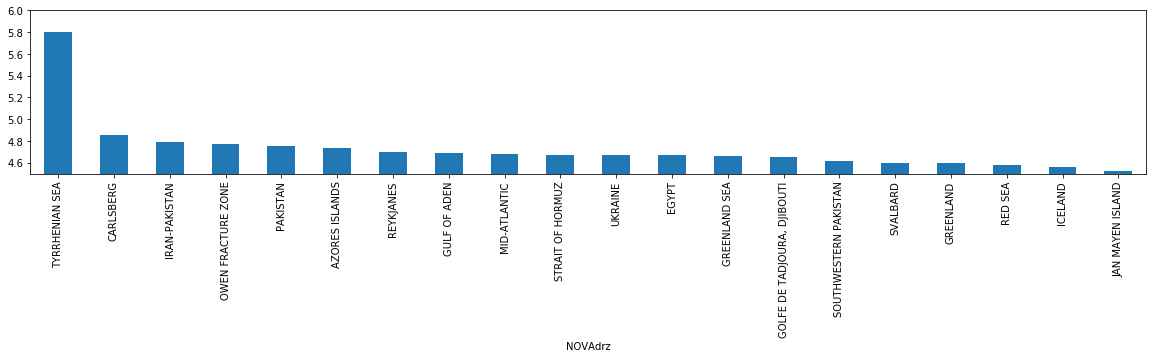

In [58]:
#vrne graf s povprečjem magnitud na državo
drzave=potres_NOVAdrz['magnituda'].mean().sort_values(ascending=False)
drzave[:20].plot(figsize=(20,3), kind='bar', ylim=[4.5,6])

Sledi, da so na Tirenskem morju v povprečju najmočnejši potresi

In [67]:
#združi vse potrese, ki so bili v isti državi
potres_NOVAdrz=potres.groupby('NOVAdrz')
#vrne povprečno magnitudo in globino
povpMagnitudaGlobina=potres_NOVAdrz['magnituda', 'globina'].mean()
#vrne tabelo s potresi, ki imajo v povprečju magnitudo višjo ali enako od 4.6
povpMagnitudaGlobina[povpMagnitudaGlobina.magnituda>=4.6]
#primerjava med povprečno magnitudo in povprečno globino

,magnituda,globina
NOVAdrz,,
AZORES ISLANDS,4.730769,8.461538
CARLSBERG,4.850000,25.000000
EGYPT,4.666667,8.222222
"GOLFE DE TADJOURA, DJIBOUTI",4.650000,3.500000
GREENLAND,4.600000,22.000000
GREENLAND SEA,4.657692,3.884615
GULF OF ADEN,4.684444,9.911111
IRAN-PAKISTAN,4.788235,56.647059
MID-ATLANTIC,4.680000,10.566667


In [62]:
#združi vse potrese, ki so bili v isti državi
potres_NOVAdrz=potres.groupby('NOVAdrz')
#vrne povprečno globino na drzavo
povpGlobina=potres_NOVAdrz['globina'].mean()
#drzave razporejene od najmanjše do največje
povpGlobina.sort_values(ascending=False)[:20]

NOVAdrz
TYRRHENIAN SEA                      449.000000
KOSOVO-SERBIA-FYROM BORDER REG.     124.333333
ROMANIA                              97.625000
ATLANTIC OCEAN                       91.000000
SICILY, ITALY                        72.045455
IRAN-PAKISTAN                        56.647059
DODECANESE ISLANDS, GREECE           49.804878
DODECANESE IS.-TURKEY BORDER REG     47.521739
CASPIAN SEA, OFFSHORE AZERBAIJAN     44.700000
ITALY                                37.460784
CYPRUS                               35.058824
SOCOTRA                              33.000000
MOROCCO                              31.272727
CASPIAN SEA, OFFSHR TURKMENISTAN     31.250000
IRAQ                                 31.200000
SAHARA                               30.000000
SOUTHEASTERN IRAN                    29.740741
MEDITERRANEAN SEA                    25.583333
CAUCASUS REGION, RUSSIA              25.375000
GIBRALTAR                            25.000000
Name: globina, dtype: float64

Na Tirenskem morju je globina izvora potresa v povprečju ponovno najmočnejša (tako kot magnituda). Iz tega bi lahko sklepali, da sta magnituda in globina med seboj povezani, zato si oglejmo nasledni graf, če nam bo prikazal kaj smiselnega.

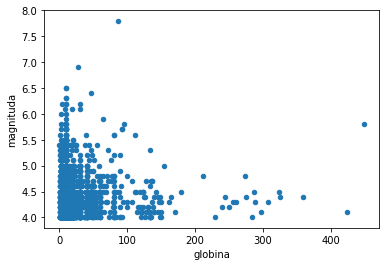

In [68]:
potres.plot(x='globina',y='magnituda', kind='scatter')

Graf zelo očitno nakaže, da z globino magnituda pada. Kar je nekako razumljivo, saj, če je potres bolj globok, se bodo vsi tresljaji oblažili do površja in ne bodo naredili toliko škode.

## Slovenija

Poglejmo še na hitro kako je bilo v Sloveniji s potresi v zajetih podatkih.

In [84]:
slovenija=potres[potres.NOVAdrz=='SLOVENIA']
slovenija

,leto,mesec,dan,ura,drzava,sirina,dolzina,globina,magnituda,NOVAdrz
id,,,,,,,,,,
467666,2015,11,1,07:52:32,SLOVENIA,45.87,15.56,6,4.3,SLOVENIA
456822,2015,8,29,18:47:04,SLOVENIA,46.31,13.58,7,4.4,SLOVENIA
373934,2014,4,22,08:58:26,SLOVENIA,45.61,14.18,25,4.5,SLOVENIA
364725,2014,3,13,17:31:59,SLOVENIA,45.75,14.85,2,4.6,SLOVENIA
321992,2013,6,16,20:04:58,SLOVENIA,45.75,14.85,7,4.0,SLOVENIA


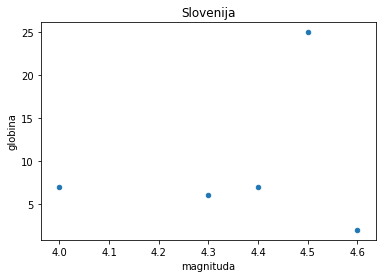

In [87]:
slovenija.plot(kind='scatter', x='magnituda',y='globina', title='Slovenija')

Opizimo, da v globini izstopa potres, ki je bil 22.4.2014 z magnitudo 4.5, skoraj ob deveti uri zjutraj. 

## Zaključek

Ugotovili smo, da se potresi zelo močno poznajo na območjih med Afriško, Evrazijsko, Arabsko in Indijsko ploščo. Letno se lahko plošče premaknejo tudi od 1cm do 18cm, seveda z različno hitrosjo in z različnimi načini.
Zato mogoče tudi ni tako zelo narobe, da so podatki zbrani bolj po regijah in ne toliko po državah, saj na določenih območjih je število potresov veliko bolj vidno, če gledamo kot območje in ne kot državo.